##Import data

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c ifood-2019-fgvc6

Saving kaggle.json to kaggle.json
kaggle.json
 99% 521M/526M [00:03<00:00, 171MB/s]
100% 526M/526M [00:03<00:00, 148MB/s]
  0% 0.00/3.63k [00:00<?, ?B/s]
100% 3.63k/3.63k [00:00<00:00, 3.05MB/s]
100% 2.11G/2.12G [00:34<00:00, 124MB/s]
100% 2.12G/2.12G [00:34<00:00, 66.3MB/s]
 96% 213M/221M [00:08<00:00, 69.7MB/s]
100% 221M/221M [00:08<00:00, 26.2MB/s]
  0% 0.00/554k [00:00<?, ?B/s]
100% 554k/554k [00:00<00:00, 256MB/s]
  0% 0.00/554k [00:00<?, ?B/s]
100% 554k/554k [00:00<00:00, 173MB/s]
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 150MB/s]
  0% 0.00/217k [00:00<?, ?B/s]
100% 217k/217k [00:00<00:00, 215MB/s]


In [0]:
!mkdir data
!unzip train_set.zip -d data
!unzip val_set.zip -d data
!unzip test_set.zip -d data
!unzip train_labels.csv.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/test_set/test_009481.jpg  
  inflating: data/test_set/test_013960.jpg  
  inflating: data/test_set/test_002362.jpg  
  inflating: data/test_set/test_005803.jpg  
  inflating: data/test_set/test_015388.jpg  
  inflating: data/test_set/test_002764.jpg  
  inflating: data/test_set/test_021964.jpg  
  inflating: data/test_set/test_013738.jpg  
  inflating: data/test_set/test_016448.jpg  
  inflating: data/test_set/test_022310.jpg  
  inflating: data/test_set/test_002203.jpg  
  inflating: data/test_set/test_003963.jpg  
  inflating: data/test_set/test_022431.jpg  
  inflating: data/test_set/test_003303.jpg  
  inflating: data/test_set/test_006227.jpg  
  inflating: data/test_set/test_016860.jpg  
  inflating: data/test_set/test_009457.jpg  
  inflating: data/test_set/test_020554.jpg  
  inflating: data/test_set/test_003655.jpg  
  inflating: data/test_set/test_006939.jpg  
  inflating: data/test_set/test_003241.jpg  
  in

## CNN

In [0]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Activation, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras import regularizers, optimizers
from keras.models import Sequential, load_model
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.optimizers import SGD
from keras.regularizers import l2
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
import datautils
from ResNet import ResNet
from keras.layers import Input
from keras.layers import Conv2D, MaxPool2D, Dense, BatchNormalization, Activation, add, GlobalAvgPool2D
from keras.models import Model
from keras import regularizers
from keras.utils import plot_model
from keras import backend as K

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


%load_ext autoreload
%autoreload 2

In [0]:
train_df = pd.read_csv('./drive/My Drive/COMP540/train_merge.csv')
val_df = pd.read_csv('./drive/My Drive/COMP540/val_merge.csv')
test_df = pd.read_csv('sample_submission.csv')
test_df['label'] = test_df['label'].astype(str)
train_dir = './data/train_set'
val_dir = './data/val_set'
test_dir = './data/test_set'
class_dic = datautils.createclass2label('./drive/My Drive/COMP540/class_list.txt')

In [0]:
train_sample = 60000
val_sample = 5000

In [0]:
res = ResNet(train_df, val_df, train_dir, val_dir, class_dic, test_df, test_dir, train_sample=train_sample, image_size=224,  batch_size=32, val_sample=val_sample, epoch=5)

#Train

In [0]:
res.build_model()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 112, 112, 64) 256         conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 112, 112, 64) 0           batch_normalization_18[0][0]     
____________________________________________________________________________________________

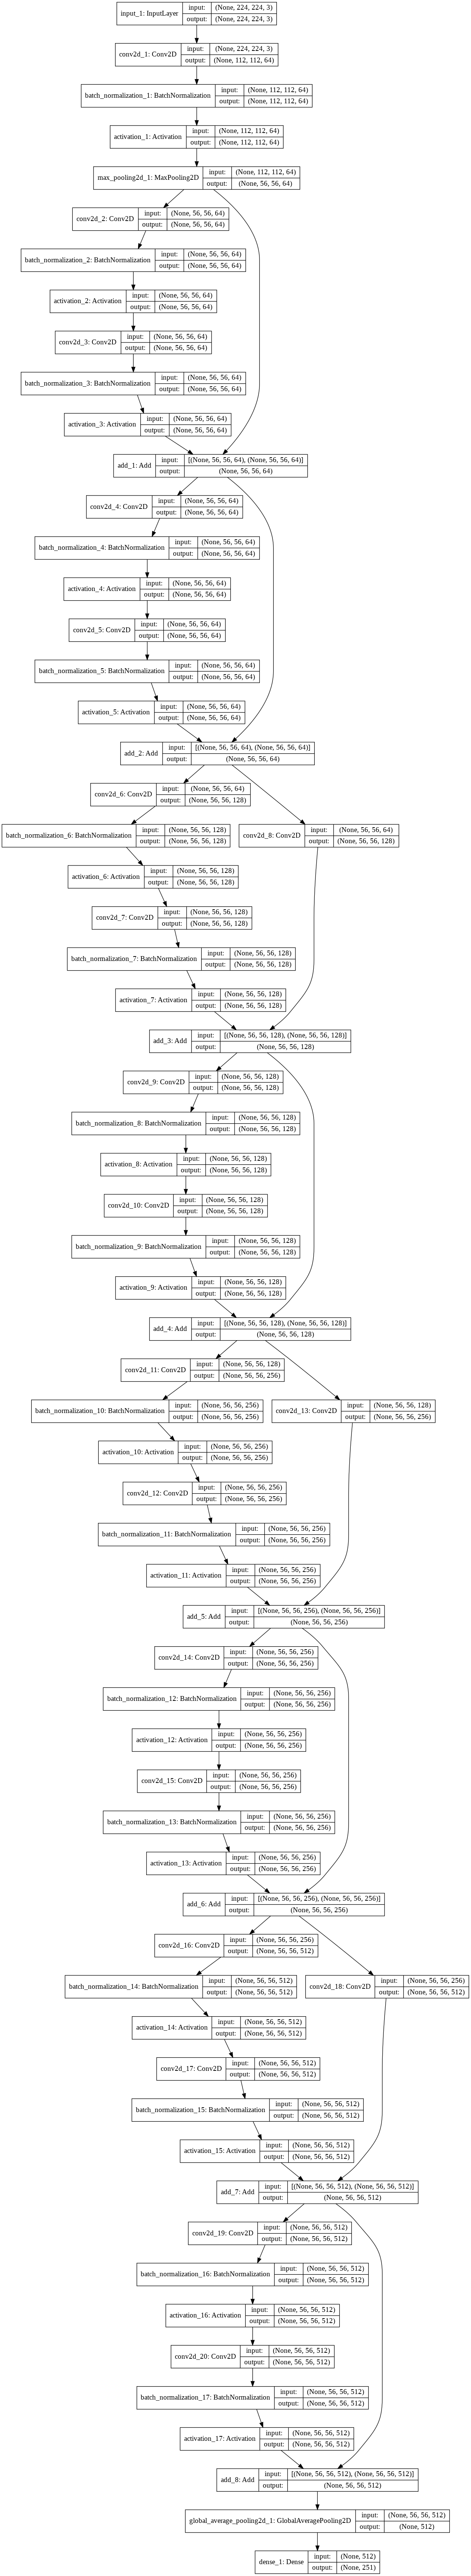

In [0]:
from keras.utils import plot_model

plot_model(res.model, to_file='model.png', show_shapes=True)

In [0]:
res.train()

Found 60000 validated image filenames belonging to 251 classes.
Found 5000 validated image filenames belonging to 251 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
1875/1875 [==============================] - 2885s 2s/step - loss: 5.3095 - acc: 0.0332 - val_loss: 5.7345 - val_acc: 0.0234

Epoch 00001: val_loss improved from inf to 5.73447, saving model to ResNet_224_60000_checkpoint.hdf5
Epoch 2/5
1875/1875 [==============================] - 2849s 2s/step - loss: 4.8948 - acc: 0.0581 - val_loss: 5.5358 - val_acc: 0.0334

Epoch 00002: val_loss improved from 5.73447 to 5.53578, saving model to ResNet_224_60000_checkpoint.hdf5
Epoch 3/5
1875/1875 [==============================] - 2839s 2s/step - loss: 4.7592 - acc: 0.0726 - val_loss: 4.9100 - val_acc: 0.0743

Epoch 00003: val_loss improved from 5.53578 to 4.90997, saving model to ResNet_224_60000_checkpoint.hdf5
Epoch 4/5
1875/1875 [==============================] - 2

In [17]:
loss, acc = res.evaluate()

Found 5000 validated image filenames belonging to 251 classes.
validation loss is 4.848104629516602, validation accuracy is 0.0678


In [18]:
df, combinedf = res.test()

Found 28377 validated image filenames belonging to 1 classes.


In [19]:
df

,img_name,pred_label
0,test_011035.jpg,218
1,test_008108.jpg,58
2,test_005334.jpg,44
3,test_023287.jpg,239
4,test_006377.jpg,224
...,...,...
28372,test_013114.jpg,148
28373,test_015863.jpg,136
28374,test_027478.jpg,250
28375,test_015089.jpg,33


In [0]:
df.to_csv('pred.csv')

In [0]:
combinedf.to_csv('combine.csv')

In [0]:
train_df.head()

,img_name,label,class
0,train_101733.jpg,211,dolmas
1,train_101734.jpg,211,dolmas
2,train_101735.jpg,211,dolmas
3,train_101736.jpg,211,dolmas
4,train_101737.jpg,211,dolmas


In [0]:
train_sample = len(train_df)
val_sample = len(val_df)
image_size = 256
batch_size = 32
num_classes = 251
model_name = f'ResNet_{image_size}_{train_sample}.hdf5'
train_generator = datautils.getDeepTrain(train_df, train_dir, sample=train_sample, image_size=image_size, batch_size=batch_size)
val_generator = datautils.getDeepTest(val_df, val_dir, sample=val_sample, image_size=image_size, batch_size=batch_size)
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size

Found 118475 validated image filenames belonging to 251 classes.
Found 11994 validated image filenames belonging to 251 classes.


In [0]:
def conv2d_bn(x, nb_filter, kernel_size, strides=(1, 1), padding='same'):
    """
    conv2d -> batch normalization -> relu activation
    """
    x = Conv2D(nb_filter, kernel_size=kernel_size,
                          strides=strides,
                          padding=padding,
                          kernel_regularizer=regularizers.l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

In [0]:
def shortcut(input, residual):
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_height = int(round(input_shape[1] / residual_shape[1]))
    stride_width = int(round(input_shape[2] / residual_shape[2]))
    equal_channels = input_shape[3] == residual_shape[3]
 
    identity = input
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        identity = Conv2D(filters=residual_shape[3],
                           kernel_size=(1, 1),
                           strides=(stride_width, stride_height),
                           padding="valid",
                           kernel_regularizer=regularizers.l2(0.0001))(input)
 
    return add([identity, residual])

In [0]:
def basic_block(nb_filter, strides=(1, 1)):
    def f(input):
 
        conv1 = conv2d_bn(input, nb_filter, kernel_size=(3, 3), strides=strides)
        residual = conv2d_bn(conv1, nb_filter, kernel_size=(3, 3))
 
        return shortcut(input, residual)
 
    return f

In [0]:
def residual_block(nb_filter, repetitions, is_first_layer=False):
    def f(input):
        for i in range(repetitions):
            strides = (1, 1)
            if i == 0 and not is_first_layer:
                strides = (2, 2)
            input = basic_block(nb_filter, strides)(input)
        return input
    return f

In [0]:
SHAPE = (image_size, image_size, 3)
input_ = Input(shape=SHAPE)
conv1 = conv2d_bn(input_, 64, kernel_size=(7, 7), strides=(2, 2))
pool1 = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv1)

conv2 = residual_block(64, 2, is_first_layer=True)(pool1)
conv3 = residual_block(128, 2, is_first_layer=True)(conv2)
conv4 = residual_block(256, 2, is_first_layer=True)(conv3)
conv5 = residual_block(512, 2, is_first_layer=True)(conv4)

pool2 = GlobalAvgPool2D()(conv5)
output_ = Dense(num_classes, activation='softmax')(pool2)

model = Model(inputs=input_, outputs=output_)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 128, 128, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 128, 128, 64) 256         conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 128, 128, 64) 0           batch_normalization_18[0][0]     
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam', loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
checkpointer_path = f'ResNet_{image_size}_{train_sample}_checkpoint.hdf5'
csv_logger_path = f'history_{num_classes}.log'
checkpointer = ModelCheckpoint(filepath=checkpointer_path, verbose=1, save_best_only=True)
csv_logger = CSVLogger(csv_logger_path)
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer]
                   )
model.save(model_name)

Epoch 1/10
3702/3702 [==============================] - 4280s 1s/step - loss: 5.1534 - acc: 0.0432 - val_loss: 5.4337 - val_acc: 0.0353

Epoch 00001: val_loss improved from inf to 5.43370, saving model to ResNet_256_118475_checkpoint.hdf5
Epoch 2/10
3702/3702 [==============================] - 4188s 1s/step - loss: 4.7175 - acc: 0.0823 - val_loss: 5.0929 - val_acc: 0.0675

Epoch 00002: val_loss improved from 5.43370 to 5.09286, saving model to ResNet_256_118475_checkpoint.hdf5
Epoch 3/10
3702/3702 [==============================] - 4128s 1s/step - loss: 4.4283 - acc: 0.1198 - val_loss: 5.1156 - val_acc: 0.0719

Epoch 00003: val_loss did not improve from 5.09286
Epoch 4/10
3702/3702 [==============================] - 4086s 1s/step - loss: 4.1958 - acc: 0.1566 - val_loss: 4.2476 - val_acc: 0.1502

Epoch 00004: val_loss improved from 5.09286 to 4.24762, saving model to ResNet_256_118475_checkpoint.hdf5
Epoch 5/10
3702/3702 [==============================] - 4053s 1s/step - loss: 4.0349 - 

#Evaluate

In [0]:
print(history.history)

In [0]:
model = load_model(model_name)

In [0]:
val_datagen = datautils.getDeepTest(val_df, val_dir, sample=len(val_df), image_size=128, batch_size=32, class_mode='class')

Found 11994 validated image filenames belonging to 251 classes.


In [0]:
val_loss, val_acc = model.evaluate_generator(val_datagen)
print(f'validation loss is {val_loss}, validation accuracy is {val_acc}')

[4.11156068556663, 0.16991829249199697]

#Test

In [0]:
test_df = pd.read_csv('./data/sample_submission.csv')
test_df['label'] = test_df['label'].astype(str)
test_dir = './data/test_set'

In [0]:
test_df

,img_name,label
0,test_024088.jpg,250
1,test_024089.jpg,250
2,test_024090.jpg,250
3,test_024091.jpg,250
4,test_024092.jpg,250
...,...,...
28372,test_024083.jpg,250
28373,test_024084.jpg,250
28374,test_024085.jpg,250
28375,test_024086.jpg,250


In [0]:
test_datagen = datautils.getDeepTest(test_df, test_dir, sample=len(test_df), image_size=128, batch_size=32, class_mode='label')

Found 28377 validated image filenames belonging to 1 classes.


In [0]:
preds = model.predict_generator(test_datagen)

In [0]:
trueclass = datautils.preds2trueclass(preds, test_datagen, train_datagen=train_generator, test=True)

In [0]:
truelabel = datautils.trueclass2label(trueclass, class_dir)

In [0]:
df, combinedf = datautils.save2csv(test_datagen, truelabel, test_df=test_df, save=True, name=f'submission_{model_name}')